In [1]:
from SmaractHelpersAlignment import SmaractPositioners
positioners = SmaractPositioners()
import time



In [10]:
positioners.findReference()


Referencing all channels


In [4]:
import time
def movementinplane(self, stepsize=400000):
    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries
    plane = [
        (x0 - 2_000_000, x0 + 2_000_000),
        (y0 - 2_000_000, y0 + 2_000_000),
        # (z0 - 2_000_000, z0 + 2_000_000),
        (a0 - 2_000_000, a0 + 2_000_000),
        (b0 - 2_000_000, b0 + 2_000_000),
        # (c0 - 2_000_000, c0 + 2_000_000),
    ]

    # Move positioners to the bottom left corner of the plane
    startPos = {
        "Fx": x0 - 2_000_000,
        "Fy": y0 - 2_000_000,
        "Fz": z0 - 2_000_000,
        "Fa": a0 - 2_000_000,
        "Fb": b0 - 2_000_000,
        "Fc": c0 - 2_000_000,
    }
    positioners.moveMultiplePositionerChannelsToAbsolutePosition(startPos)
    

    # Iterate over the plane and move in steps
    for x in range(plane[0][0], plane[0][1], stepsize):
        for y in range(plane[1][0], plane[1][1], stepsize):
            # Calculate new positions for XYZ and ABC axes
            newX = x
            newY = y
            newZ = z0  # Keep Z constant
            newA = a0 + (x - x0)
            newB = b0 + (y - y0)
            newC = c0  # Keep C constant
            
            # Move positioners to new position
            newPos = {
                "Fx": newX,
                "Fy": newY,
                "Fz": newZ,
                "Fa": newA,
                "Fb": newB,
                "Fc": newC,
            }
            # SAVE X, Y, Z, A, B, C IN CSV 
            with open('position.csv', 'a') as f:
                f.write(f"{newX},{newY}\n")
            print(newPos)
            time.sleep(0.5)
            positioners.moveMultiplePositionerChannelsToAbsolutePosition(newPos)

            print(f"Moved to position: X={newX}, Y={newY}, Z={newZ}, A={newA}, B={newB}, C={newC}")

# Call the function
movementinplane(positioners)


Current position: X=4587, Y=8606, Z=26603, A=10186, B=-9482, C=19614
{'Fx': -1995413, 'Fy': -1991394, 'Fz': 26603, 'Fa': -1989814, 'Fb': -2009482, 'Fc': 19614}
Moved to position: X=-1995413, Y=-1991394, Z=26603, A=-1989814, B=-2009482, C=19614
{'Fx': -1995413, 'Fy': -1591394, 'Fz': 26603, 'Fa': -1989814, 'Fb': -1609482, 'Fc': 19614}
Moved to position: X=-1995413, Y=-1591394, Z=26603, A=-1989814, B=-1609482, C=19614
{'Fx': -1995413, 'Fy': -1191394, 'Fz': 26603, 'Fa': -1989814, 'Fb': -1209482, 'Fc': 19614}
Moved to position: X=-1995413, Y=-1191394, Z=26603, A=-1989814, B=-1209482, C=19614
{'Fx': -1995413, 'Fy': -791394, 'Fz': 26603, 'Fa': -1989814, 'Fb': -809482, 'Fc': 19614}
Moved to position: X=-1995413, Y=-791394, Z=26603, A=-1989814, B=-809482, C=19614
{'Fx': -1995413, 'Fy': -391394, 'Fz': 26603, 'Fa': -1989814, 'Fb': -409482, 'Fc': 19614}
Moved to position: X=-1995413, Y=-391394, Z=26603, A=-1989814, B=-409482, C=19614
{'Fx': -1995413, 'Fy': 8606, 'Fz': 26603, 'Fa': -1989814, 'Fb': 

In [12]:
def movementinplane(self, stepsize=1000000):
    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates
    coordinates = []

    # Iterate over X and Y axes to create coordinate pairs
    for x in plane_X:
        for y in plane_Y:
            coordinates.append((x, y))

    # Print the matrix
    print("X and Y Coordinate Matrix:")
    for idx, coord in enumerate(coordinates):
        print(f"{coord}", end=" ")
        if (idx + 1) % (len(plane_Y)) == 0:
            print()

    # Define the plane boundaries for A and B (similar to X and Y)

# Call the function
movementinplane(positioners)


Current position: X=36188, Y=53839, Z=26241, A=118654, B=-3567, C=90154
X and Y Coordinate Matrix:
(-1963812, -1946161) (-1963812, -946161) (-1963812, 53839) (-1963812, 1053839) (-1963812, 2053839) 
(-963812, -1946161) (-963812, -946161) (-963812, 53839) (-963812, 1053839) (-963812, 2053839) 
(36188, -1946161) (36188, -946161) (36188, 53839) (36188, 1053839) (36188, 2053839) 
(1036188, -1946161) (1036188, -946161) (1036188, 53839) (1036188, 1053839) (1036188, 2053839) 
(2036188, -1946161) (2036188, -946161) (2036188, 53839) (2036188, 1053839) (2036188, 2053839) 


Current position: X=14363, Y=-19282, Z=-9164, A=110533, B=-17065, C=18797


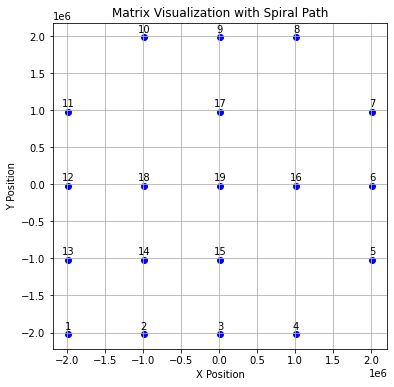

In [23]:
import matplotlib.pyplot as plt

def movementinplane(self, stepsize=1000000):
    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates in a spiral pattern
    spiral_path = []

    # Traverse the matrix in a spiral pattern and store the coordinates
    for i in range(len(plane_X) // 2):
        # Move right
        for x in plane_X[i:-1 - i]:
            spiral_path.append((x, plane_Y[i]))
        # Move down
        for y in plane_Y[i + 1:-1 - i]:
            spiral_path.append((plane_X[-1 - i], y))
        # Move left
        for x in plane_X[-2 - i:i:-1]:
            spiral_path.append((x, plane_Y[-1 - i]))
        # Move up
        for y in plane_Y[-2 - i:i:-1]:
            spiral_path.append((plane_X[i], y))

    # Handle the case of odd length of plane_X or plane_Y
    if len(plane_X) % 2 == 1:
        mid = len(plane_X) // 2
        spiral_path.append((plane_X[mid], plane_Y[mid]))

    # Store the spiral path in a file
    with open("spiral_path.txt", "w") as f:
        for idx, coord in enumerate(spiral_path):
            f.write(f"{idx + 1}: {coord[0]}, {coord[1]}\n")

    # Plot the matrix with spiral path
    X = [coord[0] for coord in spiral_path]
    Y = [coord[1] for coord in spiral_path]

    plt.figure(figsize=(6, 6))
    plt.scatter(X, Y, marker='o', color='blue')
    for idx, (x, y) in enumerate(zip(X, Y)):
        plt.annotate(str(idx + 1), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.title('Matrix Visualization with Spiral Path')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.show()

# Call the function
movementinplane(positioners)


Current position: X=10758, Y=-15733, Z=-11837, A=109314, B=-25766, C=19855


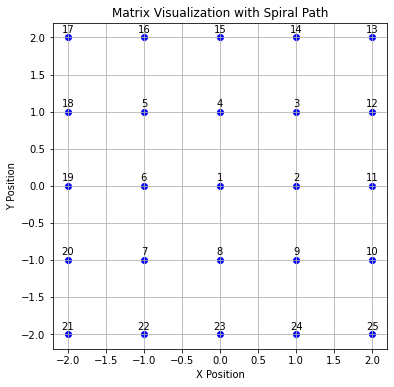

In [22]:
import matplotlib.pyplot as plt

def movementinplane(self, stepsize=1000000):
    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates in a spiral pattern
    spiral_path = []

    # Define initial position
    x, y = 0, 0

    # Define initial movement direction
    dx, dy = 0, -1

    # Iterate over each point in the plane
    for idx in range(len(plane_X) * len(plane_Y)):
        # If the current position is within the plane boundaries
        if x0 - 2_000_000 <= x <= x0 + 2_000_000 and y0 - 2_000_000 <= y <= y0 + 2_000_000:
            spiral_path.append((x, y))  # Add current position to the spiral path

        # If the next position will cause the spiral to turn
        if x == y or (x < 0 and x == -y) or (x > 0 and x == 1 - y):
            dx, dy = -dy, dx  # Change direction

        x, y = x + dx, y + dy  # Move to the next position

    # Plot the matrix with spiral path and index annotations
    X = [coord[0] for coord in spiral_path]
    Y = [coord[1] for coord in spiral_path]

    plt.figure(figsize=(6, 6))
    plt.scatter(X, Y, marker='o', color='blue')
    for i, txt in enumerate(range(1, len(spiral_path) + 1)):
        plt.annotate(txt, (X[i], Y[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.title('Matrix Visualization with Spiral Path')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.show()

# Call the function
movementinplane(positioners)


In [58]:
import time

def movementinplane(self, stepsize=1000000):
    start_time = time.time()

    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates
    coordinates = []

    # Iterate over X and Y axes to create coordinate pairs
    for y in plane_Y:
        for x in plane_X:
            coordinates.append((x, y))
    
    print("Coordinates:")
    for idx, coord in enumerate(coordinates):
        print(f"{idx + 1}: {coord}")

    # Move the positioners to each coordinate
    for idx, (newX, newY) in enumerate(coordinates):
        # Update the position dictionary
        newPos = {
            "Fx": newX,
            "Fy": newY,
            "Fz": z0,  # Keep Z constant
            "Fa": newX,
            "Fb": newY,
            "Fc": c0,  # Keep C constant
        }
        # Move the positioners
        positioners.moveMultiplePositionerChannelsToAbsolutePosition(newPos)
        print(f"Moved to position {idx + 1}/{len(coordinates)}: X={newX}, Y={newY}")

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Movement completed. Execution time: {execution_time:.2f} seconds")

# Call the function
movementinplane(positioners)


Current position: X=35256, Y=15901, Z=18777, A=38012, B=25589, C=19352
Coordinates:
1: (-1964744, -1984099)
2: (-964744, -1984099)
3: (35256, -1984099)
4: (1035256, -1984099)
5: (2035256, -1984099)
6: (-1964744, -984099)
7: (-964744, -984099)
8: (35256, -984099)
9: (1035256, -984099)
10: (2035256, -984099)
11: (-1964744, 15901)
12: (-964744, 15901)
13: (35256, 15901)
14: (1035256, 15901)
15: (2035256, 15901)
16: (-1964744, 1015901)
17: (-964744, 1015901)
18: (35256, 1015901)
19: (1035256, 1015901)
20: (2035256, 1015901)
21: (-1964744, 2015901)
22: (-964744, 2015901)
23: (35256, 2015901)
24: (1035256, 2015901)
25: (2035256, 2015901)
Moved to position 1/25: X=-1964744, Y=-1984099
Moved to position 2/25: X=-964744, Y=-1984099
Moved to position 3/25: X=35256, Y=-1984099
Moved to position 4/25: X=1035256, Y=-1984099
Moved to position 5/25: X=2035256, Y=-1984099
Moved to position 6/25: X=-1964744, Y=-984099
Moved to position 7/25: X=-964744, Y=-984099
Moved to position 8/25: X=35256, Y=-9840

Current position: X=19539, Y=36862, Z=2028, A=-13161, B=-25699, C=28143


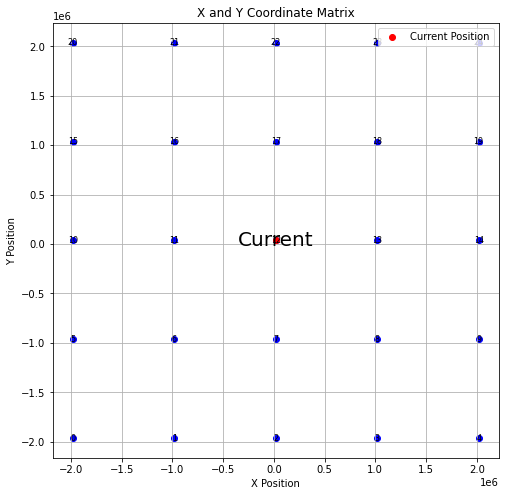

In [49]:
import matplotlib.pyplot as plt

def movementinplane(self, stepsize=1000000):
    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates
    coordinates = []

    # Iterate over X and Y axes to create coordinate pairs
    for y in plane_Y:
        for x in plane_X:
            coordinates.append((x, y))

    # Plot the coordinates with index numbers
    plt.figure(figsize=(8, 8))
    for idx, coord in enumerate(coordinates):
        plt.scatter(coord[0], coord[1], color='blue')
        plt.text(coord[0], coord[1], str(idx), fontsize=8, ha='center', va='center')

    # Plot current position
    plt.scatter(x0, y0, color='red', label='Current Position')
    plt.text(x0, y0, 'Current', fontsize=20, ha='center', va='center')

    plt.title('X and Y Coordinate Matrix')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Define the plane boundaries for A and B (similar to X and Y)

# Call the function
movementinplane(positioners)


Current position: X=121300, Y=433573, Z=328927, A=129784, B=401199, C=256301
Coordinates:
1: (-1878700, -1566427)
2: (-1878700, -566427)
3: (-1878700, 433573)
4: (-1878700, 1433573)
5: (-1878700, 2433573)
6: (-878700, 2433573)
7: (121300, 2433573)
8: (1121300, 2433573)
9: (2121300, 2433573)
10: (2121300, 1433573)
11: (2121300, 433573)
12: (2121300, -566427)
13: (2121300, -1566427)
14: (1121300, -1566427)
15: (121300, -1566427)
16: (-878700, -1566427)
17: (-878700, -566427)
18: (-878700, 433573)
19: (-878700, 1433573)
20: (121300, 1433573)
21: (1121300, 1433573)
22: (1121300, 433573)
23: (1121300, -566427)
24: (121300, -566427)
25: (121300, 433573)
Moved to position 1/25: X=-1878700, Y=-1566427
{'Fx': -1886244, 'Fy': -1567758, 'Fz': 327180, 'Fa': -1876193, 'Fb': -1570365, 'Fc': 262595}
Moved to position 2/25: X=-1878700, Y=-566427
{'Fx': -1878890, 'Fy': -567341, 'Fz': 328766, 'Fa': -1876820, 'Fb': -558247, 'Fc': 252987}
Moved to position 3/25: X=-1878700, Y=433573
{'Fx': -1877713, 'Fy':

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Moved to position 24/25: X=121300, Y=-566427
{'Fx': 120118, 'Fy': -568584, 'Fz': 330868, 'Fa': 117868, 'Fb': -564549, 'Fc': 255757}
Moved to position 25/25: X=121300, Y=433573
{'Fx': 126787, 'Fy': 436878, 'Fz': 329186, 'Fa': 117154, 'Fb': 426134, 'Fc': 249829}


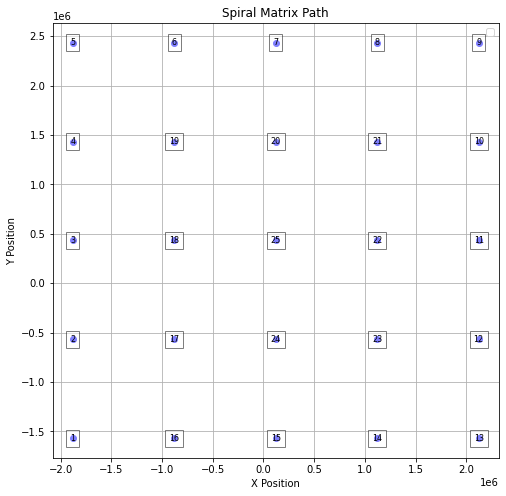

Movement completed. Execution time: 3.91 seconds


In [67]:
import time
import matplotlib.pyplot as plt

def movementinplane(self, stepsize=1000000):
    start_time = time.time()

    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates
    coordinates = []

    # Create a spiral path
    m = len(plane_Y)
    n = len(plane_X)
    seen = [[False] * n for _ in range(m)]
    dx = [0, 1, 0, -1]
    dy = [1, 0, -1, 0]
    x, y = 0, 0
    di = 0

    for _ in range(m * n):
        coordinates.append((plane_X[x], plane_Y[y]))
        seen[y][x] = True
        nx, ny = x + dx[di], y + dy[di]
        if 0 <= nx < n and 0 <= ny < m and not seen[ny][nx]:
            x, y = nx, ny
        else:
            di = (di + 1) % 4
            x, y = x + dx[di], y + dy[di]

    print("Coordinates:")
    for idx, coord in enumerate(coordinates):
        print(f"{idx + 1}: {coord}")

    # Plot the path
    plt.figure(figsize=(8, 8))
    # Move the positioners to each coordinate
    for idx, (newX, newY) in enumerate(coordinates):
        # Update the position dictionary
        newPos = {
            "Fx": newX,
            "Fy": newY,
            "Fz": z0,  # Keep Z constant
            "Fa": newX,
            "Fb": newY,
            "Fc": c0,  # Keep C constant
        }
        # Move the positioners
        positioners.moveMultiplePositionerChannelsToAbsolutePosition(newPos)
        print(f"Moved to position {idx + 1}/{len(coordinates)}: X={newX}, Y={newY}")
        print(positioners.getPositions())

    for idx, (newX, newY) in enumerate(coordinates):
        plt.scatter(newX, newY, color='blue')
        plt.text(newX, newY, str(idx + 1), fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    # Plot current position
    # plt.scatter(x0, y0, color='red', label='Current Position')
    # plt.text(x0, y0, 'Current', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Spiral Matrix Path')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.legend()
    plt.show()

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Movement completed. Execution time: {execution_time:.2f} seconds")

# Call the function
movementinplane(positioners)


In [11]:
import time
import matplotlib.pyplot as plt

def movementinplane(self, stepsize=1000000):
    start_time = time.time()

    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")

    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Define the plane boundaries for X and Y
    plane_X = range(x0 - 2_000_000, x0 + 2_000_000 + stepsize, stepsize)
    plane_Y = range(y0 - 2_000_000, y0 + 2_000_000 + stepsize, stepsize)

    # Create a list to store coordinates
    coordinates = []

    # Create a horizontal spiral path
    m = len(plane_Y)
    n = len(plane_X)
    seen = [[False] * n for _ in range(m)]
    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
    x, y = 0, 0
    di = 0

    for _ in range(m * n):
        coordinates.append((plane_X[x], plane_Y[y]))
        seen[y][x] = True
        nx, ny = x + dx[di], y + dy[di]
        if 0 <= nx < n and 0 <= ny < m and not seen[ny][nx]:
            x, y = nx, ny
        else:
            di = (di + 1) % 4
            x, y = x + dx[di], y + dy[di]

    print("Coordinates:")
    for idx, coord in enumerate(coordinates):
        print(f"{idx + 1}: {coord}")

    # Plot the path
    plt.figure(figsize=(6, 6))
    # Move the positioners to each coordinate
    for idx, (newX, newY) in enumerate(coordinates):
        # Update the position dictionary
        newPos = {
            "Fx": newX,
            "Fy": newY,
            "Fz": z0,  # Keep Z constant
            "Fa": newX,
            "Fb": newY,
            "Fc": c0,  # Keep C constant
        }
        # Move the positioners
        positioners.moveMultiplePositionerChannelsToAbsolutePosition(newPos)
        print(f"Moved to position {idx + 1}/{len(coordinates)}: X={newX}, Y={newY}")
        print(positioners.getPositions())

    for idx, (newX, newY) in enumerate(coordinates):
        plt.scatter(newX, newY, color='blue')
        plt.text(newX, newY, str(idx + 1), fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    # Plot current position
    # plt.scatter(x0, y0, color='red', label='Current Position')
    # plt.text(x0, y0, 'Current', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Spiral Matrix Path')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.legend()
    plt.show()

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Movement completed. Execution time: {execution_time:.2f} seconds")

# Call the function
# movementinplane(positioners)
# 

In [3]:
positioners.movePositionerChannelToAbsolutePosition("Fz", 400_000_000)
positioners.movePositionerChannelToAbsolutePosition("Fc", 400_000_000)

Current position: X=4046, Y=-1235, Z=400000492, A=-5540, B=-8359, C=399997701
Current position: X=-2000, Y=-380, Z=400000352, A=218, B=1028, C=400001808
Coordinates:
1: (-2002000, -2000380)
2: (-1002000, -2000380)
3: (-2000, -2000380)
4: (998000, -2000380)
5: (1998000, -2000380)
6: (1998000, -1000380)
7: (1998000, -380)
8: (1998000, 999620)
9: (1998000, 1999620)
10: (998000, 1999620)
11: (-2000, 1999620)
12: (-1002000, 1999620)
13: (-2002000, 1999620)
14: (-2002000, 999620)
15: (-2002000, -380)
16: (-2002000, -1000380)
17: (-1002000, -1000380)
18: (-2000, -1000380)
19: (998000, -1000380)
20: (998000, -380)
21: (998000, 999620)
22: (-2000, 999620)
23: (-1002000, 999620)
24: (-1002000, -380)
25: (-2000, -380)
Moved to position 1/25: X=-2002000, Y=-2000380
{'Fx': -2005256, 'Fy': -2000544, 'Fz': 399998569, 'Fa': -2001259, 'Fb': -1995564, 'Fc': 400004420}
Moved to position 2/25: X=-1002000, Y=-2000380
{'Fx': -997905, 'Fy': -2001048, 'Fz': 400001677, 'Fa': -1005459, 'Fb': -2003314, 'Fc': 399

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


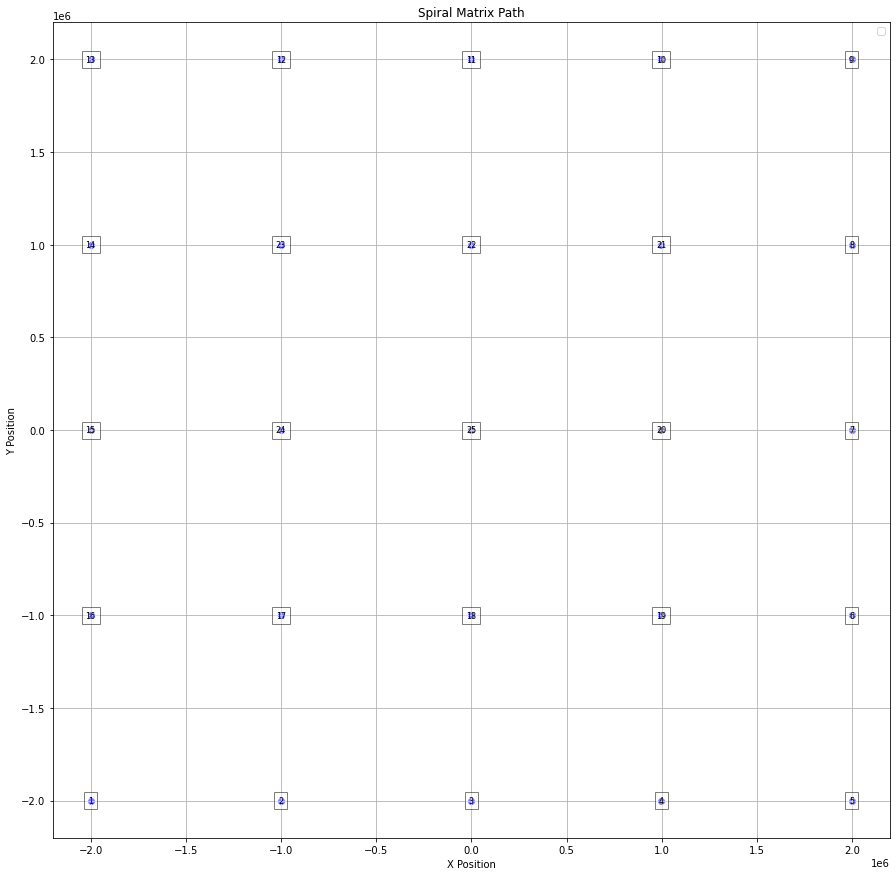

Movement completed. Execution time: 3.79 seconds


In [7]:
def move_in_spiral_with_z(positioners, z_position, stepsize=1000000):
     
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")
    # Get current positions of XYZ and ABC axes
    newPos = {
            "Fx": 0,
            "Fy": 0,
            "Fz": z0,  # Keep Z constant
            "Fa": 0,
            "Fb": 0,
            "Fc": c0,  # Keep C constant
        }
    
    positioners.moveMultiplePositionerChannelsToAbsolutePosition(newPos)
    positioners.movePositionerChannelToAbsolutePosition("Fz", z_position)
    positioners.movePositionerChannelToAbsolutePosition("Fc", z_position)

    #get position
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")
    print(f"Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

    # Call the main function with the specified z-axis position
    movementinplane(positioners, stepsize=stepsize)

# Call the new function
move_in_spiral_with_z(positioners, z_position=400_000_000)


Moved to Z position: 400000000, Current position: X=-48, Y=361, Z=400002876, A=-144, B=4962, C=400000928
Current position: X=-602, Y=-1716, Z=400000010, A=-3674, B=-6349, C=400000766
Coordinates:
1: (-2000602, -2001716)
2: (-1000602, -2001716)
3: (-602, -2001716)
4: (999398, -2001716)
5: (1999398, -2001716)
6: (1999398, -1001716)
7: (1999398, -1716)
8: (1999398, 998284)
9: (1999398, 1998284)
10: (999398, 1998284)
11: (-602, 1998284)
12: (-1000602, 1998284)
13: (-2000602, 1998284)
14: (-2000602, 998284)
15: (-2000602, -1716)
16: (-2000602, -1001716)
17: (-1000602, -1001716)
18: (-602, -1001716)
19: (999398, -1001716)
20: (999398, -1716)
21: (999398, 998284)
22: (-602, 998284)
23: (-1000602, 998284)
24: (-1000602, -1716)
25: (-602, -1716)
Moved to position 1/25: X=-2000602, Y=-2001716
{'Fx': -2002323, 'Fy': -2006197, 'Fz': 400000049, 'Fa': -2005262, 'Fb': -2007932, 'Fc': 400001041}
Moved to position 2/25: X=-1000602, Y=-2001716
{'Fx': -997139, 'Fy': -2000628, 'Fz': 400000549, 'Fa': -9982

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Moved to position 24/25: X=-1000602, Y=-1716
{'Fx': -1002556, 'Fy': -4325, 'Fz': 399999095, 'Fa': -998233, 'Fb': -1816, 'Fc': 400000823}
Moved to position 25/25: X=-602, Y=-1716
{'Fx': 2929, 'Fy': -1631, 'Fz': 400000010, 'Fa': -1630, 'Fb': -633, 'Fc': 400001618}


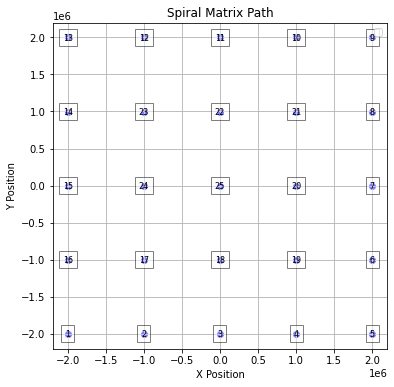

Movement completed. Execution time: 3.80 seconds
Moved to Z position: 800000000, Current position: X=3435, Y=538, Z=800001306, A=154, B=300, C=800002541
Current position: X=4275, Y=606, Z=800000027, A=-5075, B=-4204, C=800001937
Coordinates:
1: (-1995725, -1999394)
2: (-995725, -1999394)
3: (4275, -1999394)
4: (1004275, -1999394)
5: (2004275, -1999394)
6: (2004275, -999394)
7: (2004275, 606)
8: (2004275, 1000606)
9: (2004275, 2000606)
10: (1004275, 2000606)
11: (4275, 2000606)
12: (-995725, 2000606)
13: (-1995725, 2000606)
14: (-1995725, 1000606)
15: (-1995725, 606)
16: (-1995725, -999394)
17: (-995725, -999394)
18: (4275, -999394)
19: (1004275, -999394)
20: (1004275, 606)
21: (1004275, 1000606)
22: (4275, 1000606)
23: (-995725, 1000606)
24: (-995725, 606)
25: (4275, 606)
Moved to position 1/25: X=-1995725, Y=-1999394
{'Fx': -1995183, 'Fy': -1999612, 'Fz': 800000047, 'Fa': -1996340, 'Fb': -2000714, 'Fc': 800001534}
Moved to position 2/25: X=-995725, Y=-1999394
{'Fx': -995934, 'Fy': -19

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Moved to position 24/25: X=-995725, Y=606
{'Fx': -998659, 'Fy': -1899, 'Fz': 799999080, 'Fa': -994580, 'Fb': 18937, 'Fc': 799999360}
Moved to position 25/25: X=4275, Y=606
{'Fx': 10753, 'Fy': -421, 'Fz': 800000510, 'Fa': -2385, 'Fb': -6136, 'Fc': 800005236}


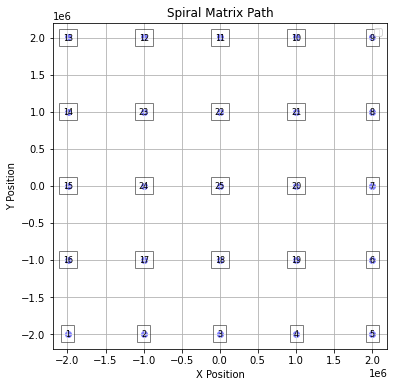

Movement completed. Execution time: 3.84 seconds
Moved to Z position: -800000000, Current position: X=4178, Y=-2879, Z=-800003830, A=7844, B=17707, C=-799995056
Current position: X=5923, Y=760, Z=-800002933, A=407, B=-7274, C=-800001124
Coordinates:
1: (-1994077, -1999240)
2: (-994077, -1999240)
3: (5923, -1999240)
4: (1005923, -1999240)
5: (2005923, -1999240)
6: (2005923, -999240)
7: (2005923, 760)
8: (2005923, 1000760)
9: (2005923, 2000760)
10: (1005923, 2000760)
11: (5923, 2000760)
12: (-994077, 2000760)
13: (-1994077, 2000760)
14: (-1994077, 1000760)
15: (-1994077, 760)
16: (-1994077, -999240)
17: (-994077, -999240)
18: (5923, -999240)
19: (1005923, -999240)
20: (1005923, 760)
21: (1005923, 1000760)
22: (5923, 1000760)
23: (-994077, 1000760)
24: (-994077, 760)
25: (5923, 760)
Moved to position 1/25: X=-1994077, Y=-1999240
{'Fx': -1992361, 'Fy': -2000675, 'Fz': -800005009, 'Fa': -1994503, 'Fb': -1997259, 'Fc': -800003303}
Moved to position 2/25: X=-994077, Y=-1999240
{'Fx': -998046,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Moved to position 24/25: X=-994077, Y=760
{'Fx': -993300, 'Fy': -2695, 'Fz': -800001187, 'Fa': -995162, 'Fb': -952, 'Fc': -799998616}
Moved to position 25/25: X=5923, Y=760
{'Fx': 3746, 'Fy': -1195, 'Fz': -800001600, 'Fa': 8526, 'Fb': -1952, 'Fc': -800000743}


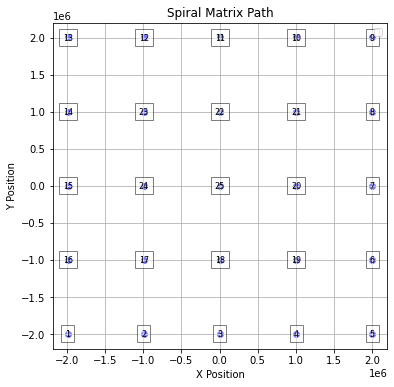

Movement completed. Execution time: 3.69 seconds


In [12]:
def move_in_spiral_with_multiple_z(positioners, z_positions, stepsize=1000000):
    # Get current positions of XYZ and ABC axes
    x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")
    
    # Iterate over each z-axis position
    for z_position in z_positions:
        HomePos = {
            "Fx": 0,
            "Fy": 0,
            "Fz": z0,  # Keep Z constant
            "Fa": 0,
            "Fb": 0,
            "Fc": c0,  # Keep C constant
        }
        positioners.moveMultiplePositionerChannelsToAbsolutePosition(HomePos)

        newPos = {
            "Fx": 0,
            "Fy": 0,
            "Fz": z_position,  # Keep Z constant
            "Fa": 0,
            "Fb": 0,
            "Fc": z_position,  # Keep C constant
        }
        positioners.moveMultiplePositionerChannelsToAbsolutePosition(newPos)
        
        

        # Get current position after moving to the new z-axis position
        x0, y0, z0, a0, b0, c0 = positioners.getFiberPosition(returnType="list")
        print(f"Moved to Z position: {z_position}, Current position: X={x0}, Y={y0}, Z={z0}, A={a0}, B={b0}, C={c0}")

        # Call the main function with the specified z-axis position
        movementinplane(positioners, stepsize=stepsize)

# Call the function with multiple z-axis positions
move_in_spiral_with_multiple_z(positioners, z_positions=[400_000_000, 800_000_000, -800_000_000])
